# Vancouver Crime Analysis - STAT 201 Project Proposal
Wendy Phung

## Introduction
Vancouver, with a population of approximately 2.842 million and the second-largest proportion of immigrants at about 41.8%, is known to be a popular destination for immigrants. However, many immigrants may not be fully aware of the safety of the neighborhoods in Vancouver before moving there.

The aim of this project is to investigate the crime rates in two of the most densely populated areas in Vancouver, specifically District 1 and District 3, by utilizing the VPD geographic map. The goal is to determine which area is safer to reside in. For the purposes of this report, a safe neighborhood is defined as one with relatively low occurrences of violent crimes that directly impact individuals, such as Break and Enter Residential/Other, Homicide, and Offence Against a Person.

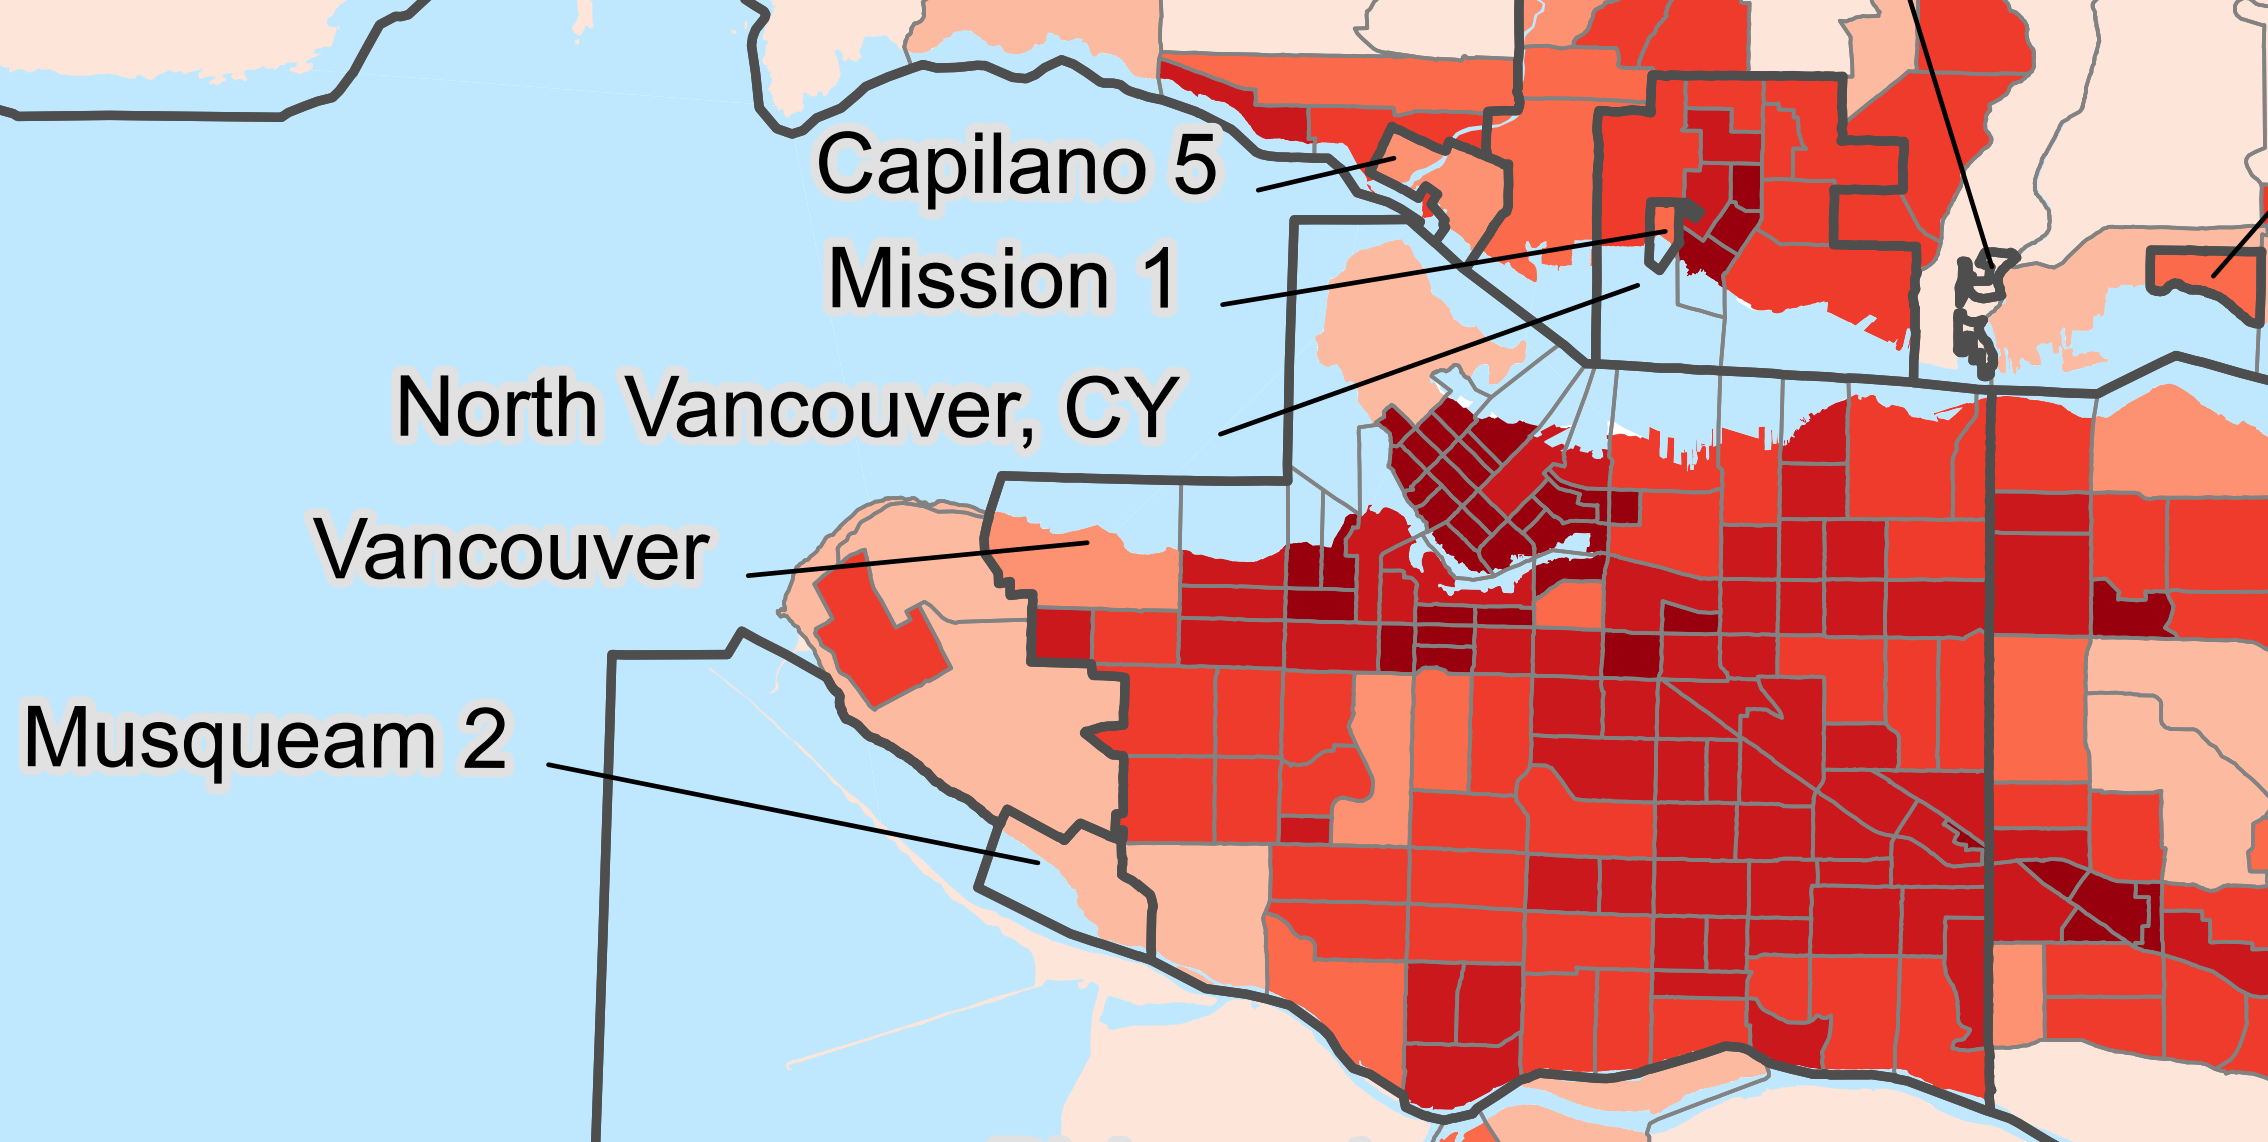,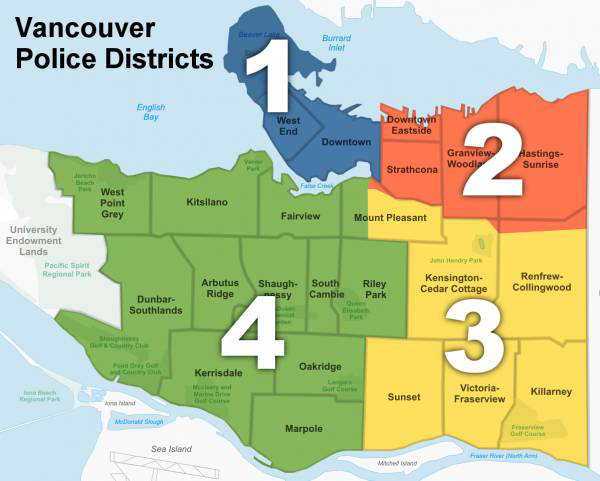


### Research Question and Parameter
The primary question that we aim to answer is **which of the two districts is the "safer" place to live in**. In order to quantify this question, we have defined "safer" as having a lower proportion of violent crimes against individuals. As a result, the parameter we want to use is the **proportion of violent crime against individuals** (Break and Enter of Residential Properties, Homicides, and Offences Against a Person(s)). Our sample is based off the Vancouver Crime Data Dataset from the VPD's dataset, and contains reported crime data from **the last 10 years** (2013-2022, inclusive), and our population of interest is all crime that occurs in the two regions. 

We will be determining if 
(a) there is a significant difference in proportions between the two districts and 
(b) if there is a difference, which region has a lower proportion?

Our parameter of interest is the proportion of violent crimes to regular crimes. This will be used to estimate the difference in proportions between the two regions. We also plan to estimate the mean of the violent crime proportions across the two regions.

### Identify and Describe the Dataset
The dataset used in this project is the Vancouver Crime Data Dataset from the Vancouver Police Department's database. This dataset contains 10 variables, including the type of crime, location of crime(neighbourhood, X/Y coordinates, street block), and time of the crime.

For each observation, we will be looking at the proportion of violent crimes against individuals to total crimes in the region. The timeframe for each observation will be one month, creating 120 observations for each region (10 years * 12 months), for a total of 240 observations in our sample. 


## Preliminary exploratory data analysis

#### Loading the libraries

In [2]:
install.packages("infer")
library(tidyverse)
library(broom)
library(repr)
library(digest)
library(infer)
library(gridExtra)
library(haven)
library(tidyr)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

also installing the dependency ‘patchwork’



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




#### Reading the dataset from Web into R

In [3]:
url <- 'https://github.com/cass12345/stat201-data/raw/main/crimedata.csv.zip'
download.file(url, 'data.zip')
unzip('data.zip')

raw_data <- read_csv('crimedata.csv')
head(raw_data)

Rows: 853944 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Break and Enter Commercial,2012,12,14,8,52,NA,Oakridge,491285.0,5453433
Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490613.0,5457110
Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.8,5459174
Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.8,5459174
Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9,5459166
Break and Enter Commercial,2020,7,28,19,12,10XX ALBERNI ST,West End,491015.9,5459166


#### Filter out the data of the 10 years period, from 2013 to 2022

In [4]:
crime_data<- raw_data %>%
    filter(2013<= YEAR, YEAR <= 2022)

head(crime_data)

TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490613.0,5457110
Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.8,5459174
Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.8,5459174
Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9,5459166
Break and Enter Commercial,2020,7,28,19,12,10XX ALBERNI ST,West End,491015.9,5459166
Break and Enter Commercial,2021,11,21,6,33,10XX ALBERNI ST,West End,491015.9,5459166


#### Exploring raw data

1. **Yearly Crime Number in last 10 years**

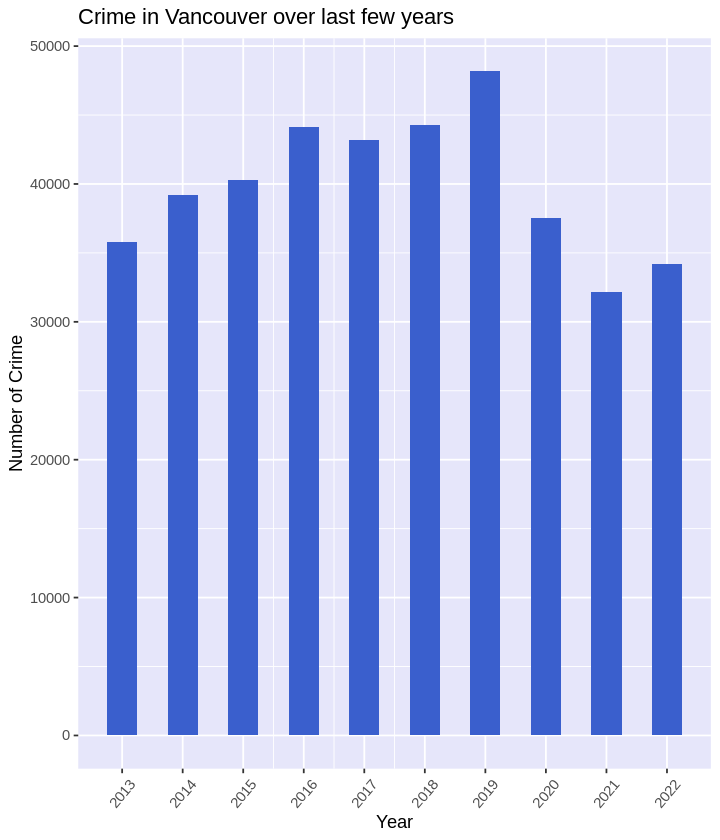

In [5]:
options(repr.plot.width = 6, repr.plot.height = 7)

yearly_crime_bar_chart <- 
ggplot(crime_data, aes(x = YEAR)) +
geom_histogram(binwidth = 0.5, fill = "royalblue3") +
labs(y = "Number of Crime", x = "Year", title = "Crime in Vancouver over last few years") + 
theme(axis.text.x = element_text(angle = 50, vjust = 0.5),
          panel.background = element_rect(fill =   "lavender"))+
    scale_x_continuous(breaks = unique(crime_data$YEAR))

yearly_crime_bar_chart

2. **Crime Categories**

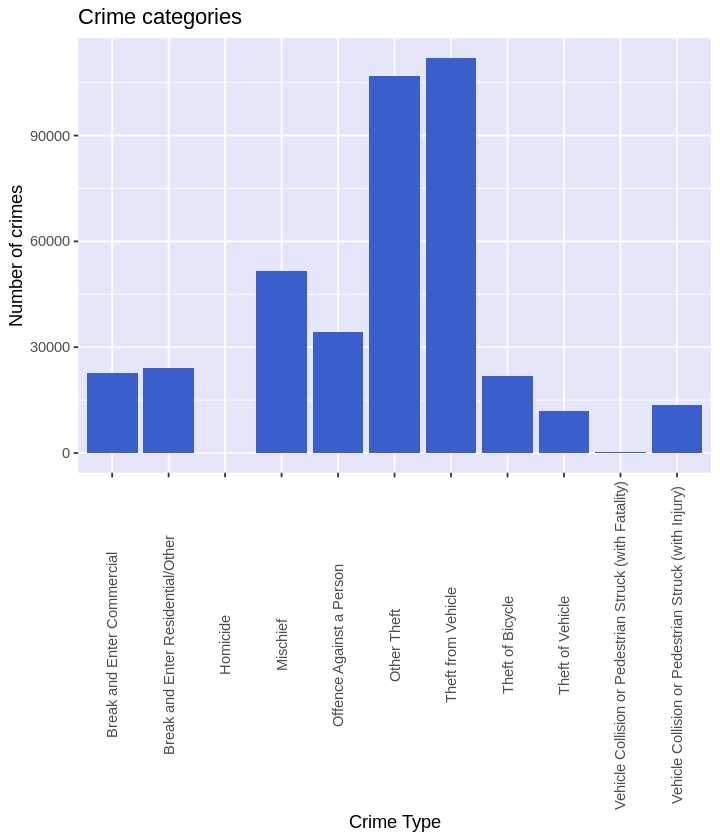

In [6]:
options(repr.plot.width = 6, repr.plot.height = 7)

crime_type_bar_chart <- ggplot(crime_data, aes(TYPE))+
     geom_bar(fill = "royalblue3")+ 
     labs(x="Crime Type", y="Number of crimes", title = "Crime categories")+
     theme(axis.text.x = element_text(angle = 90,vjust = 0.5), panel.background = element_rect(fill = "lavender"))
     
crime_type_bar_chart 

#### Exploring detailed data

In [7]:
filtered_data<- crime_data%>%
    filter(NEIGHBOURHOOD %in% c('West End', 'Stanley Park', 'Central Business District', 'Mount Pleasant', 'Kensington-Cedar Cottage',
                             'Renfrew-Collingwood', 'Killarney', 'Victoria-Fraserview', 'Sunset')) %>%
    mutate(DISTRICT = ifelse(NEIGHBOURHOOD %in% c('West End', 'Stanley Park', 'Central Business District'), 
                            "District 1", "District 3")) %>%
    group_by(DISTRICT)

head(filtered_data)

TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,DISTRICT
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.8,5459174,District 1
Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.8,5459174,District 1
Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9,5459166,District 1
Break and Enter Commercial,2020,7,28,19,12,10XX ALBERNI ST,West End,491015.9,5459166,District 1
Break and Enter Commercial,2021,11,21,6,33,10XX ALBERNI ST,West End,491015.9,5459166,District 1
Break and Enter Commercial,2022,1,5,7,34,10XX ALBERNI ST,West End,491015.9,5459166,District 1


1. **Yearly Crime numbers by categories of crime and districtsoptions(repr.plot.width = 30, repr.plot.height = 10):**

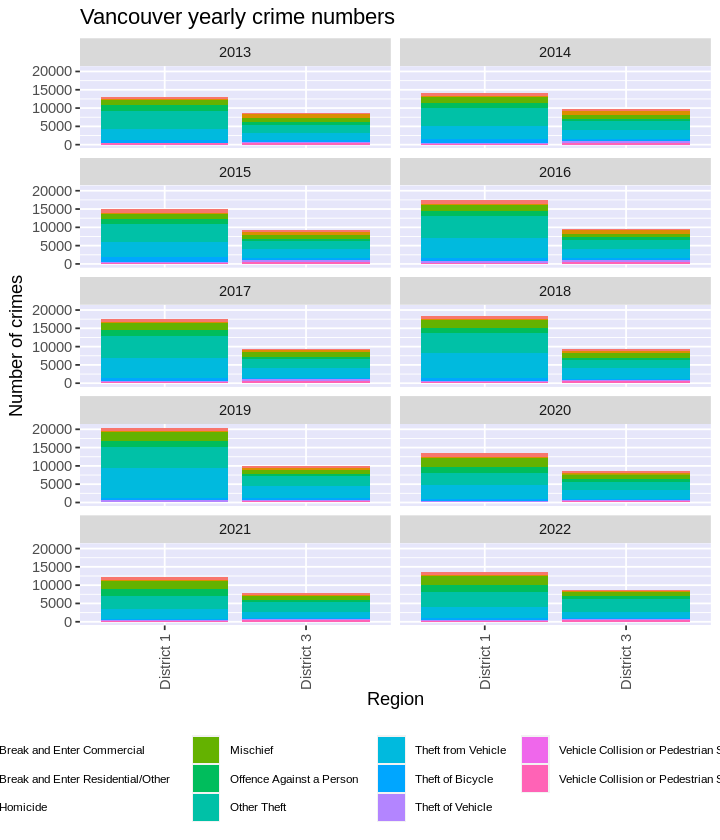

In [8]:
options(repr.plot.width = 6, repr.plot.height = 7)

filtered_crime_by_category_district <-
ggplot(filtered_data, aes(DISTRICT, fill = TYPE))+
     geom_bar()+ 
     labs(x="Region", y="Number of crimes", title = "Vancouver yearly crime numbers")+
     theme(axis.text.x = element_text(angle = 90,vjust = 0.5), 
           panel.background = element_rect(fill = "lavender"),
           legend.text = element_text(size = 7), legend.title = element_blank(), legend.position = "bottom")+
     facet_wrap(~YEAR, ncol = 2)

filtered_crime_by_category_district

2. **Crime in two districts in the past 10 years**:

`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.


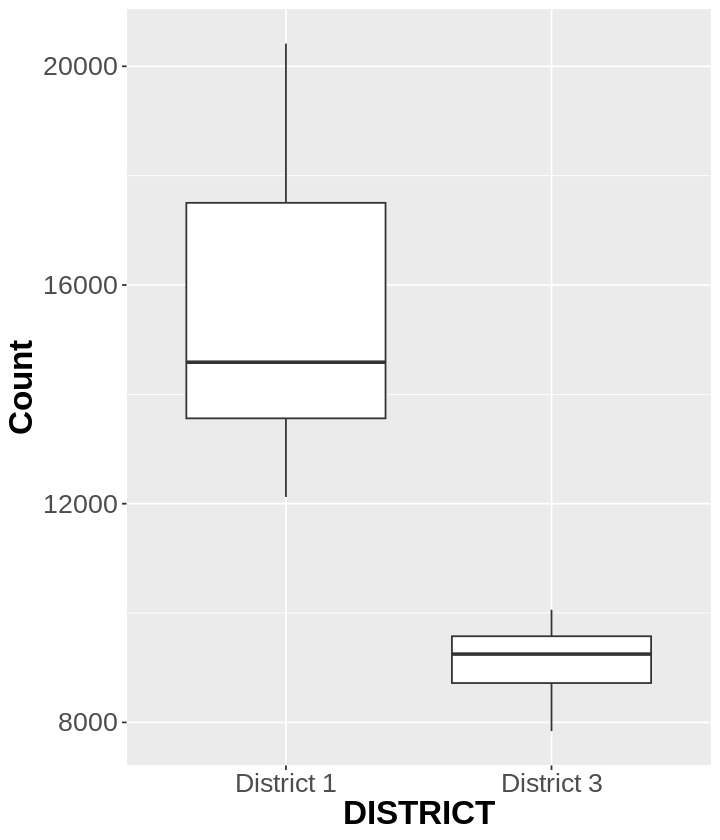

In [9]:
options(repr.plot.width = 6, repr.plot.height = 7)

compare_crime <- filtered_data %>% 
group_by(YEAR, DISTRICT) %>%
summarise(Count = n())

compare_box <- compare_crime %>%
ggplot(aes(x = DISTRICT, y = Count))+
geom_boxplot() +
theme(axis.text=element_text(size=16),
     axis.title=element_text(size=20,face="bold"))

compare_box

3. **Proportion of Violent Crime over Total Crime**:

VIOLENT_CRIME,Count,Percentage
<chr>,<int>,<dbl>
Others,137539,88.61
Violent Crime,17686,11.39


VIOLENT_CRIME,Count,Percentage
<chr>,<int>,<dbl>
Others,78010,85.43
Violent Crime,13301,14.57


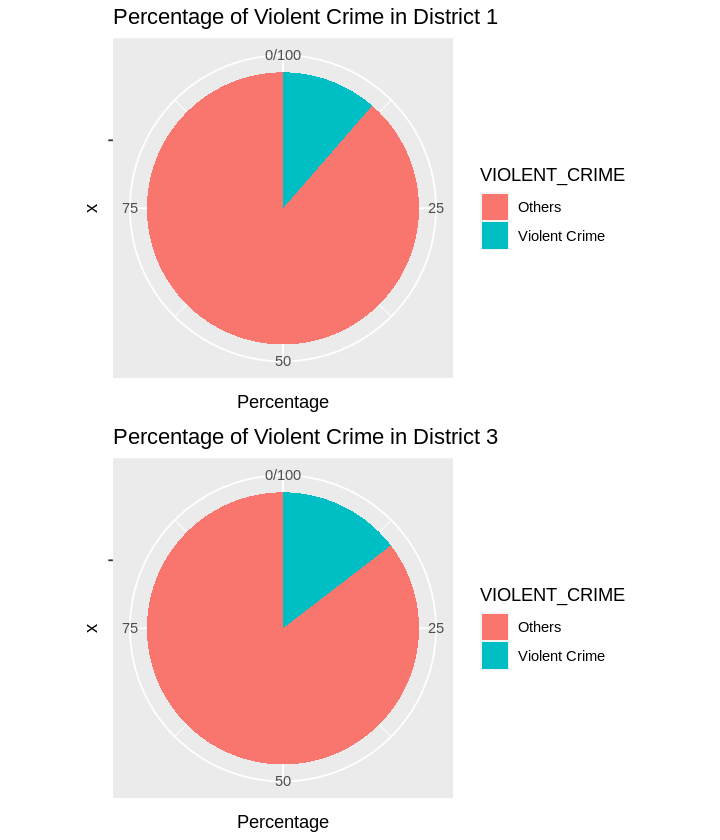

In [10]:
options(repr.plot.width = 6, repr.plot.height = 7)

violent_data_district_1 <- filtered_data %>% 
filter(DISTRICT == "District 1") %>%
mutate(VIOLENT_CRIME = ifelse(TYPE %in% c('Break and Enter Residential/Other', 'Homicide', 'Offence Against a Person'), 
                            "Violent Crime", "Others"))

violent_percentage_district_1 <- violent_data_district_1 %>%
group_by(VIOLENT_CRIME) %>%
summarise(Count = n()) %>%
mutate (Percentage = round(100 * Count/ sum(Count), 2))
violent_percentage_district_1 

violent_data_district_3 <- filtered_data %>% 
filter(DISTRICT == "District 3") %>%
mutate(VIOLENT_CRIME = ifelse(TYPE %in% c('Break and Enter Residential/Other', 'Homicide', 'Offence Against a Person'), 
                            "Violent Crime", "Others"))
violent_percentage_district_3 <- violent_data_district_3 %>%
group_by(VIOLENT_CRIME) %>%
summarise(Count = n()) %>%
mutate (Percentage = round(100 * Count/ sum(Count), 2))
violent_percentage_district_3

pie_violent_district_1 <- 
ggplot(violent_percentage_district_1, aes(x = "", y = Percentage, fill = VIOLENT_CRIME)) +
geom_bar(stat = "identity", width = 1) + 
coord_polar(theta = "y") + 
ggtitle("Percentage of Violent Crime in District 1")

pie_violent_district_3 <- 
ggplot(violent_percentage_district_3, aes(x = "", y = Percentage, fill = VIOLENT_CRIME)) +
geom_bar(stat = "identity", width = 1) + 
coord_polar(theta = "y") + 
ggtitle("Percentage of Violent Crime in District 3")

gridExtra::grid.arrange(pie_violent_district_1, pie_violent_district_3, ncol = 1)

Based on the charts provided, it is evident that District 3 has fewer overall crimes than District 1, and its proportion of "violent crime" is also slightly lower.

4. **Bootstrapping to find mean of violent crime for each District:**

`summarise()` has grouped output by 'DISTRICT'. You can override using the
`.groups` argument.
Setting `type = "bootstrap"` in `generate()`.

Setting `type = "bootstrap"` in `generate()`.



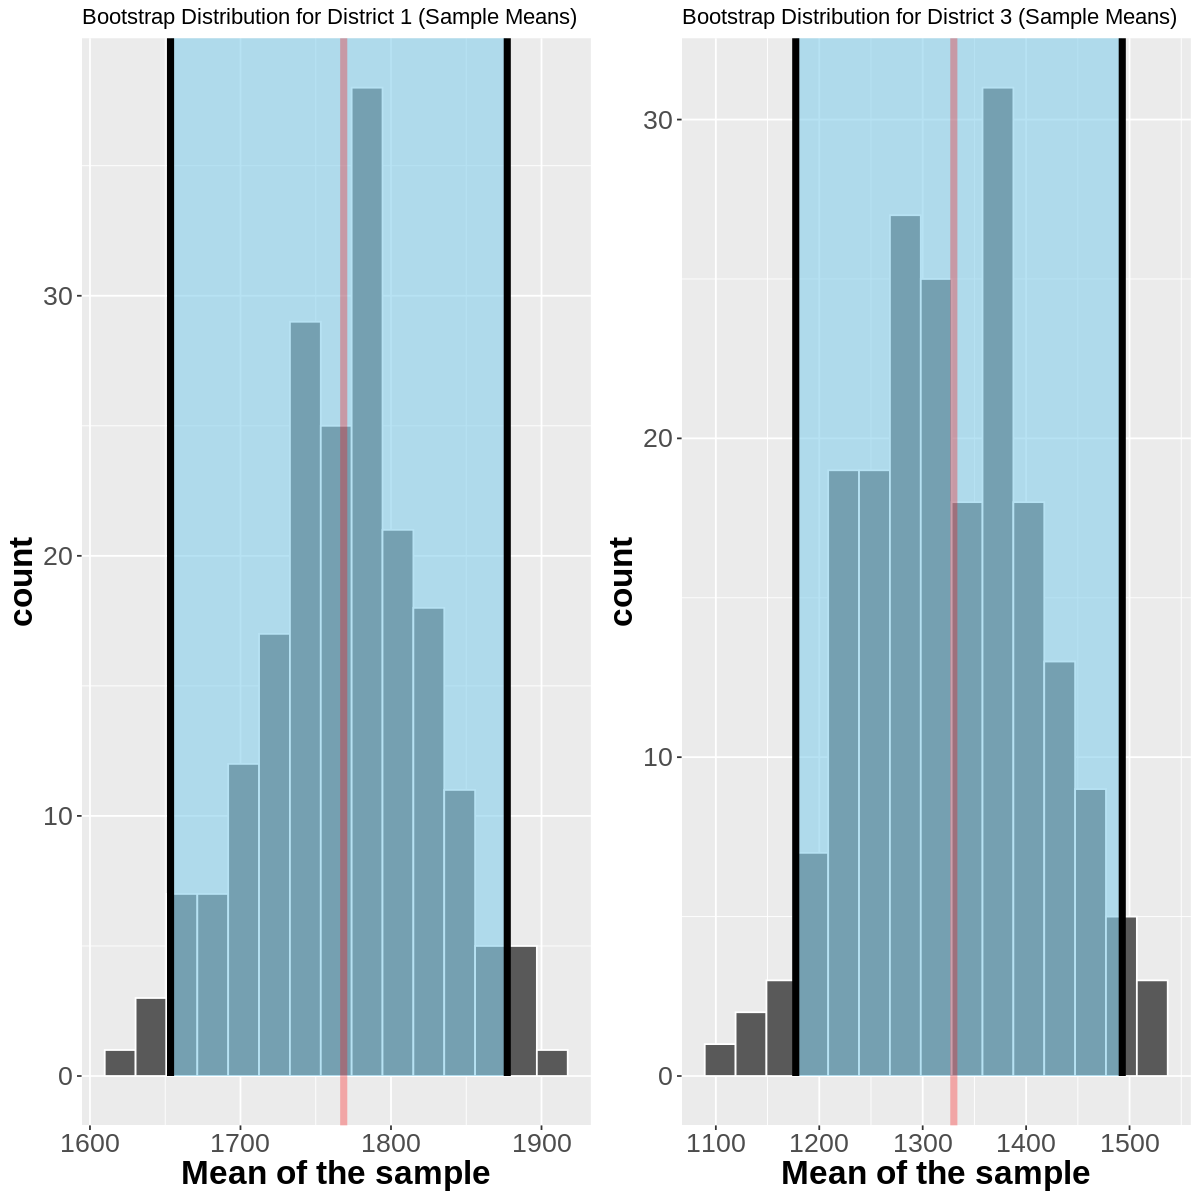

In [11]:
options(repr.plot.width = 10, repr.plot.height = 10)

both_district_violent_data <- filtered_data %>%
filter(TYPE == 'Break and Enter Residential/Other' | TYPE == 'Homicide'| TYPE == 'Offence Against a Person') %>%
group_by(DISTRICT, YEAR) %>%
summarize(Count = n())

district_1_bootstrap_mean_sample <- both_district_violent_data %>%
filter(DISTRICT == "District 1") %>%
specify (response = Count) %>%
generate(reps = 200) %>%
calculate (stat = "mean")

district_1 <- both_district_violent_data %>%
filter(DISTRICT == "District 1")

district_1_mean <- mean(district_1$Count)

district_1_percentile_mean_ci <- district_1_bootstrap_mean_sample %>%
get_confidence_interval(level = 0.95, type = "percentile")

district_1_bootstrap_mean_sample_plot <- visualise(district_1_bootstrap_mean_sample)+
shade_ci(endpoints = district_1_percentile_mean_ci, color = "black", fill = "sky blue") +
geom_vline(xintercept = district_1_mean, color = "red", alpha = .3, lwd = 2) +
labs(title = "Bootstrap Distribution for District 1 (Sample Means)", x = "Mean of the sample") +
theme(axis.text=element_text(size=16),
     axis.title=element_text(size=20,face="bold"))

district_3_bootstrap_mean_sample <- both_district_violent_data %>%
filter(DISTRICT == "District 3") %>%
specify (response = Count) %>%
generate(reps = 200) %>%
calculate (stat = "mean")

district_3 <- both_district_violent_data %>%
filter(DISTRICT == "District 3")

district_3_mean <- mean(district_3$Count)

district_3_percentile_mean_ci <- district_3_bootstrap_mean_sample %>%
get_confidence_interval(level = 0.95, type = "percentile")

district_3_bootstrap_mean_sample_plot <- visualise(district_3_bootstrap_mean_sample)+
shade_ci(endpoints = district_3_percentile_mean_ci, color = "black", fill = "sky blue") +
geom_vline(xintercept = district_3_mean, color = "red", alpha = .3, lwd = 2) +
labs(title = "Bootstrap Distribution for District 3 (Sample Means)", x = "Mean of the sample") +
theme(axis.text=element_text(size=16),
     axis.title=element_text(size=20,face="bold"))

gridExtra::grid.arrange(district_1_bootstrap_mean_sample_plot, district_3_bootstrap_mean_sample_plot, ncol = 2)

The side-by-side histogram shows the distribution of the bootstrapping samples of District 1 and District 3.

First, we obtained 200 bootstrapping sample for District 1 and District 3 separately. The, we plotted the distribution of the instances of crimes as a histogram for both district. A red line marking the mean of the sample and 95% confidence intervals was also added to the plot. 

The result shows that the mean of District 1 is 1768.6, and 95% confidence interval is around 186. While that data for District 3 is 1330.1 and 332.8.

5. **Bootstrapping to find proportions of violent crimes for each District**

[1] 0.1139176

lower_ci,upper_ci
<dbl>,<dbl>
0.1124682,0.1155178


[1] 0.145733

lower_ci,upper_ci
<dbl>,<dbl>
0.1432738,0.148061


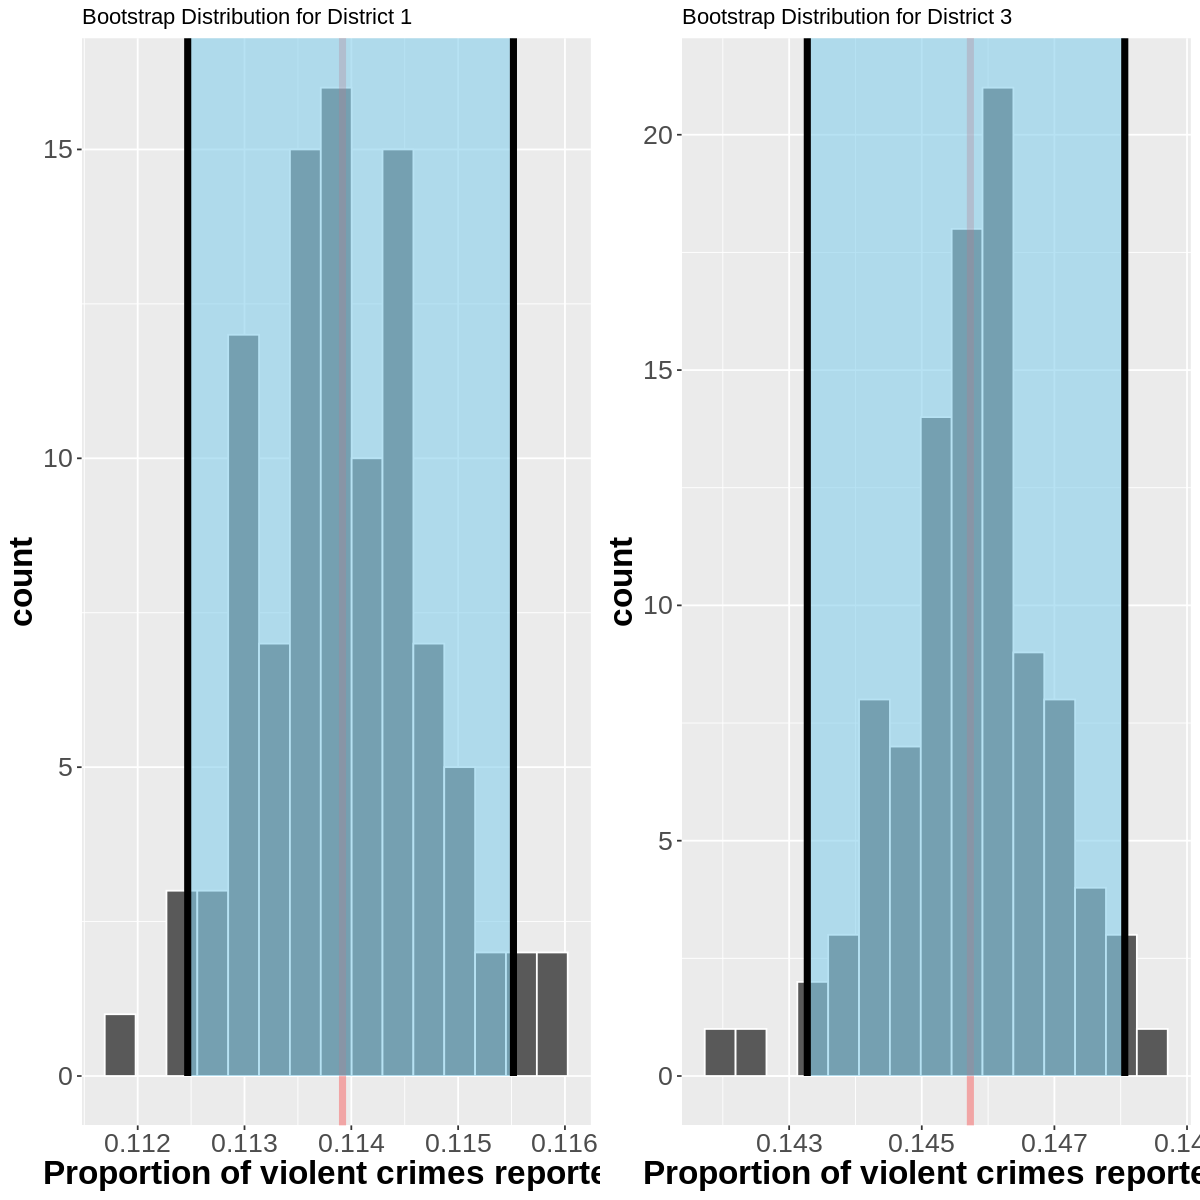

In [12]:
district_1_crime <- filtered_data %>%
filter(DISTRICT == "District 1") %>%
mutate(VIOLENT_CRIME = ifelse(TYPE %in% c('Break and Enter Residential/Other', 'Homicide', 'Offence Against a Person'), 
                            "Violent Crime", "Others"))

district_3_crime <- filtered_data %>%
filter(DISTRICT == "District 3") %>%
mutate(VIOLENT_CRIME = ifelse(TYPE %in% c('Break and Enter Residential/Other', 'Homicide', 'Offence Against a Person'), 
                            "Violent Crime", "Others"))

district_1_crime_sample <- district_1_crime %>%
specify(response = VIOLENT_CRIME, success = "Violent Crime") %>%
generate(type = "bootstrap", reps = 100) %>%
calculate(stat = "prop")

district_1_crime_sample_mean <- mean(district_1_crime_sample$stat)
district_1_crime_percentile_ci <- district_1_crime_sample %>%
get_ci(level = 0.95, type = "percentile")
district_1_crime_sample_mean
district_1_crime_percentile_ci

district_1_crime_sample_plot <- visualise(district_1_crime_sample)+
geom_vline(xintercept = district_1_crime_sample_mean, color = "red", alpha = .3, lwd = 2) +
shade_ci(endpoints = district_1_crime_percentile_ci, color = "black", fill = "sky blue") +
labs(title = "Bootstrap Distribution for District 1", x = "Proportion of violent crimes reported") +
theme(axis.text=element_text(size=16),
     axis.title=element_text(size=20,face="bold"))

district_3_crime_sample <- district_3_crime %>%
specify(response = VIOLENT_CRIME, success = "Violent Crime") %>%
generate(type = "bootstrap", reps = 100) %>%
calculate(stat = "prop")

district_3_crime_sample_mean <- mean(district_3_crime_sample$stat)
district_3_crime_percentile_ci <- district_3_crime_sample %>%
get_ci(level = 0.95, type = "percentile")
district_3_crime_sample_mean
district_3_crime_percentile_ci

district_3_crime_sample_plot <- visualise(district_3_crime_sample)+
geom_vline(xintercept = district_3_crime_sample_mean, color = "red", alpha = .3, lwd = 2) +
shade_ci(endpoints = district_3_crime_percentile_ci, color = "black", fill = "sky blue") +
labs(title = "Bootstrap Distribution for District 3", x = "Proportion of violent crimes reported") +
theme(axis.text=element_text(size=16),
     axis.title=element_text(size=20,face="bold"))

gridExtra::grid.arrange(district_1_crime_sample_plot, district_3_crime_sample_plot, ncol = 2)

The side-by-side histogram shows the distribution of the bootstrapping samples of District 1 and District 3.

First, we obtained 100 bootstrapping sample for District 1 and District 3 separately. The, we plotted the distribution of the instances of crimes as a histogram for both district. A red line marking the mean of the sample proportion and 95% confidence intervals was also added to the plot. 

The result shows that the mean of proportion of District 1 is 0.114, and 95% confidence interval is around 0.003. While that data for District 3 is 0.146 and 0.004.

### Hypothesis Test:
- Null Hypothesis $H_0$: The ratio of violent crime in District 1 is the same as that in District 3.
- Alternative Hypothesis $H_{\alpha}$: There is a difference between the ratio of violent crime in District 1 and District 3.
- Significance Level ($\alpha$): 0.05

### Confidence Intervals:
- Parameters of Interest: Average Sample Proportion of Violent Crimes by Month, Difference in Proportions
- Confidence Level: 95%

We are expecting to find that there will be a difference in the proportion of crime between there two regions. If there is a significant difference, we expect the imapct of our findings to indicate that one region is "safer" for individuals than another region.

Some addition analysis and questions may include looking at historical crime trends over time, exploring the number of violent crimes relative to the populations of different regions, or exploring comparisons between other regions in Vancouver.

In [13]:
filtered_data_year_grouped <- filtered_data %>%
group_by(DISTRICT, YEAR) %>%
summarize(COUNT = n())

hyp1 <- filtered_data_year_grouped %>%
specify(COUNT ~ DISTRICT) %>%
hypothesise(null = "independence") %>%
generate(reps = 2000, type = "permute") %>%
calculate(stat = "diff in means", order = c("District 1", "District 3"))

head(hyp1)

`summarise()` has grouped output by 'DISTRICT'. You can override using the
`.groups` argument.


replicate,stat
<int>,<dbl>
1,-1382.0
2,-399.8
3,361.6
4,287.6
5,-1926.2
6,-803.2


p_value
<dbl>
0.397


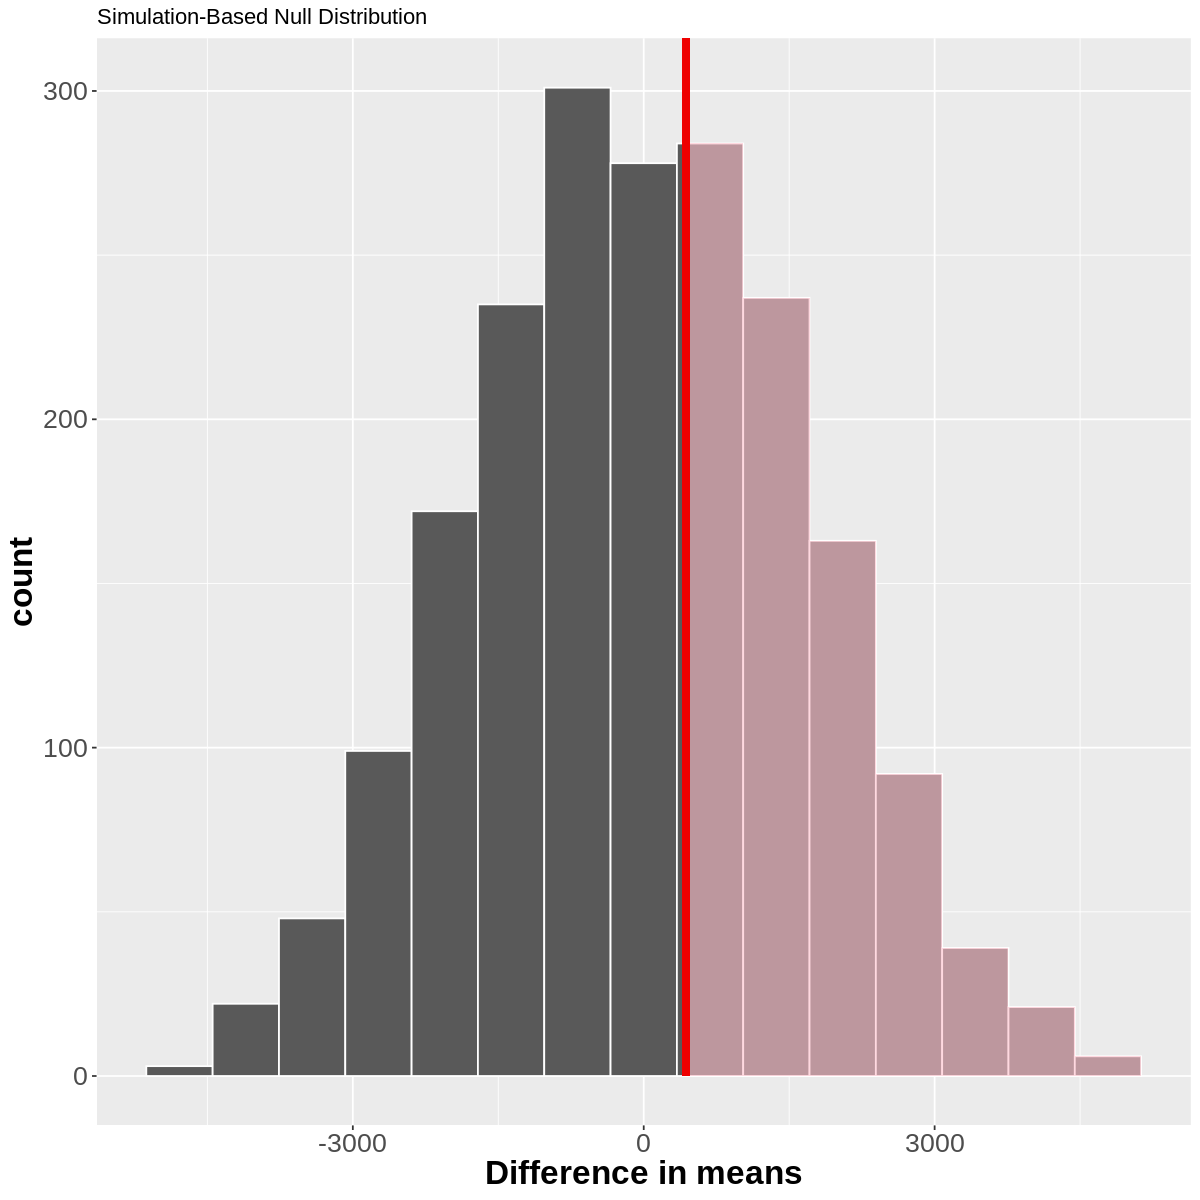

In [14]:
hyp1_plot <- hyp1 %>%
visualise() + 
shade_p_value(obs_stat = round(district_1_mean, 0) - round(district_3_mean, 0), direction = "right") +
xlab("Difference in means") +
theme(axis.text=element_text(size=16),
     axis.title=element_text(size=20,face="bold"))

hyp1_plot

hyp1_p_value <- hyp1 %>%
get_p_value(obs_stat = round(district_1_mean, 0) - round(district_3_mean, 0), direction = "right")

hyp1_p_value

## Methods: Plan

### Report Summary
This report is based off of 10 years of publicly-available crime data directly from the Vancouver Police Department's Crime Dataset. We would like to use this data as a sample to try and compare the proportion of Violent Crime against individuals in two different districts. This is publicly available, verified crime data pulled directly from the VPD. 

We would like to determine if there is significant difference in the proportion of violent crime between the two regions. While a quick calculation of summary statistics reveals that there is indeed a difference in the average proportion of violent crimes between the two regions selected, this is not sufficient evidence to determine that there is a differene - this is only sample taken over ten years, and does not represent our population of interest - the real crime rate across all periods, not just reported crime over the ten year period. This difference could therefore be attributed to random discrepancies in our sample without further analysis.

We would therefore like to conduct an more indepth analysis using hypothesis testing to determine if this discepancy is significant or if it most likely came from sampling variation. We will also being using confidence intervals to determine a feasible range of proportions for the true underlying population, as well as a comparison of variances/standard deviations of our samples.

For our analysis, we will be using both similation-based inference methods (via bootstrapping), as well as asymptotics/theory-based methods. We will then compare the results of the two methods.

We will be using a 0.05 Significance level and a (1-α) 95% Confidence level for our analysis.


## References
'Threatened with bodily harm': Vancouverites Express safety concerns about New Tent City. Vancouver Is Awesome. Retrieved March 15, 2023, https://www.vancouverisawesome.com/local-news/tent-city-vancouver-dtes-safety-concerns-5588921 

“2022 saw a 12 per cent increase in violent crime in Vancouver”. CTV News. Retrieved March 14, 2023, https://bc.ctvnews.ca/2022-saw-a-12-per-cent-increase-in-violent-crime-in-vancouver-compared-to-pre-pandemic-levels-report-1.6287304

Resident population of Canada in 2022, by metropolitan area. Statista. Retrieved March 15, 2023, https://www.statista.com/statistics/443749/canada-population-by-metropolitan-area/#:~:text=Canada%27s%20largest%20metropolitan%20area%20is,million%20people%20as%20of%202022

Immigrants make up the largest share of the population. Statistics Canada. Retrieved March 10, 2023, https://www150.statcan.gc.ca/n1/daily-quotidien/221026/dq221026a-eng.htm

Canada’s Immigration Levels Plan 2023-2025. Canada Visa. Retrieved March 15, 2023, https://www.canadavisa.com/canada-immigration-levels-plans.html

Vancouver Crime Data. Vancouver Police Department. Retrieved March 9, 2023, https://geodash.vpd.ca/opendata/ 